Visualisations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#find the headlines of given sites, and edit them all to the same list format
cnn = pd.read_csv('cnn_classified.csv')
cnn.columns.values[1] = 'clickbait'
cnnlist = cnn['clickbait'].tolist()

apn = pd.read_csv('apn_classified.csv')
apn.columns.values[1] = 'clickbait'
apnlist = apn['clickbait'].tolist()

npr = pd.read_csv('npr_classified.csv')
npr.columns.values[0] = 'headline'
npr.columns.values[1] = 'clickbait'
nprlist = npr['clickbait'].tolist()

buzzfeed = pd.read_csv('buzzfeed_classified.csv')
buzzfeed.columns.values[0] = 'headline'
buzzfeed.columns.values[1] = 'clickbait'
buzzfeedlist = buzzfeed['clickbait'].tolist()

bbc = pd.read_csv('bbc_classified.csv')
bbc.columns.values[0] = 'headline'
bbc.columns.values[1] = 'clickbait'
bbclist = bbc['clickbait'].tolist()


#creating lists, connecting them with the names of the sites
lists=[apnlist, cnnlist, nprlist, buzzfeedlist, bbclist]
names=['AP News', 'CNN', 'NPR', 'BuzzFeed', 'BBC']


#calculating the percentage of clickbaits/news for each site
datas=[]
for data in lists:
    listed = pd.DataFrame({
        'Clickbait': data
    })
    datas.append(listed)
    
percentages=[]
for data in datas:
    clickbait_count = (data['Clickbait'] == 1).sum()
    total_count = len(data)
    percentage = ((total_count - clickbait_count) / total_count) * 100
    percentages.append(percentage)
#print(percentages)


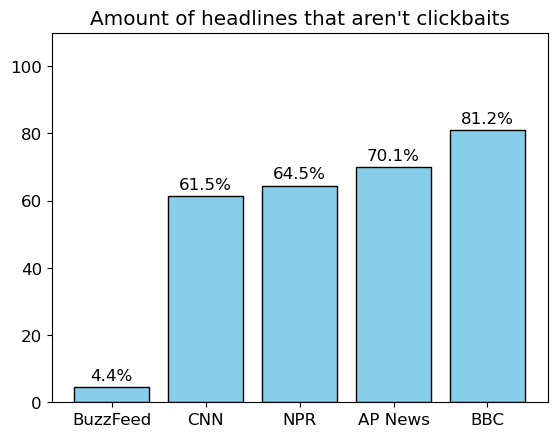

In [2]:
#creating a dataframe of the given data
df = pd.DataFrame({
    'Site': names,
    'Percentage': percentages
})

#change font size
plt.rcParams.update({'font.size': 12})

#choose the exact rows that are being used
selected_sites = ['AP News', 'CNN', 'BuzzFeed']
selected_sites = names #default: all sites are being used
chosen = df[df['Site'].isin(selected_sites)].reset_index(drop=True)

#re-ordering the values to be correct order
chosen = chosen.sort_values(by='Percentage', ascending=True).reset_index(drop=True)

#and plotting/visualising it
plt.figure()

#choose if you want to highlight a specific site
highlight='CNN'
highlight='None' #default: no highlight

plt.bar(chosen['Site'], chosen['Percentage'],color='skyblue', edgecolor='black',linewidth=[3 if name == highlight else 1 for name in chosen['Site']])
plt.ylim(0,110)

for i, row in chosen.iterrows():
    plt.text(i, row['Percentage'] + 2, f'{row['Percentage']:.1f}%', ha='center', fontweight='bold' if row['Site']==highlight else 'normal')

plt.title("Amount of headlines that aren't clickbaits")
plt.show()
